<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Comparaci%C3%B3n_de_m%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solución de Problemas de Valor Inicial
### Juan Pablo Escobar Naranjo

Encuentre una aproximación a  $x(t)$ , dado:

$\dot { x } =f(t,x)$ 

$x(t)(t=0)=x_{0}$

###Método de Euler

Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento h. 

### Método de Runge Kutta

Los métodos de Runge-Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor inicial.

En este documento, se realizará la comparación entre los métodos de Euler y de Runge-Kutta de cuarto orden. En este repositorio, hay un archivo dedicado especificamente al estudio y ejecución de cada método, por ello, se invita (en caso tal de su desconocimiento) a observar primero dichos documentos. 

In [5]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Definimos el método de Runge Kutta de cuarto orden

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x


# Definimos el método de Euler 

def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x    

A continuación vamos a definir los sistemas que queremos analizar:


#### Sistema 1: 
\begin{equation}
\dot { x } =ax
\end{equation}

#### Sistema 2: 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

#### Sistema 3 (Ecuación Logística): 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


#### Sistema 4 (Circuito RC Transladado): 
\begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}



In [3]:
def sistema1(t, x, a):
    x_dot = a*x
    return x_dot

def sistema2(t, x, a):
    x_dot = a*np.sin(x)
    return x_dot    

def sistema3(t, x, a):
    x_dot = 0.02*x*(1-x/a)
    return x_dot

def sistema4(t, x, a):
    x_dot = -x/(a)
    return x_dot

### Sistema Lineal 

1. \begin{equation}
\dot { x } =ax
\end{equation}


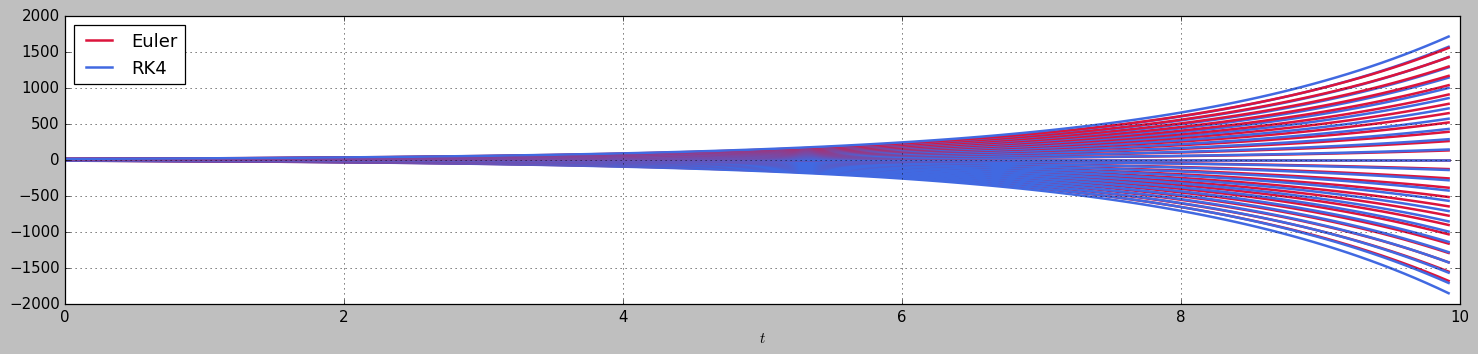

In [16]:
a = 0.5
h = 0.08
ti = 0
tf = 10
x0 = 0.8

plt.figure(figsize=(20, 4), dpi=90)
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( sistema1, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema1, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Sistema No lineal 

2. 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

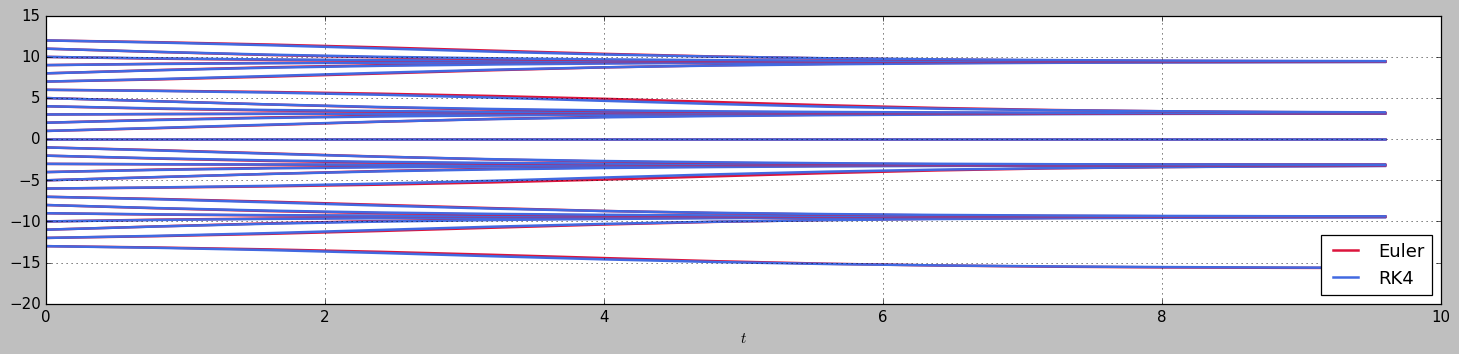

In [19]:
a = 0.5
h = 0.8
ti = 0
tf = 10
x0 = 0.8

plt.figure(figsize=(20, 4), dpi=90)
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( sistema2, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema2, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Ecuación Logística

3. 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


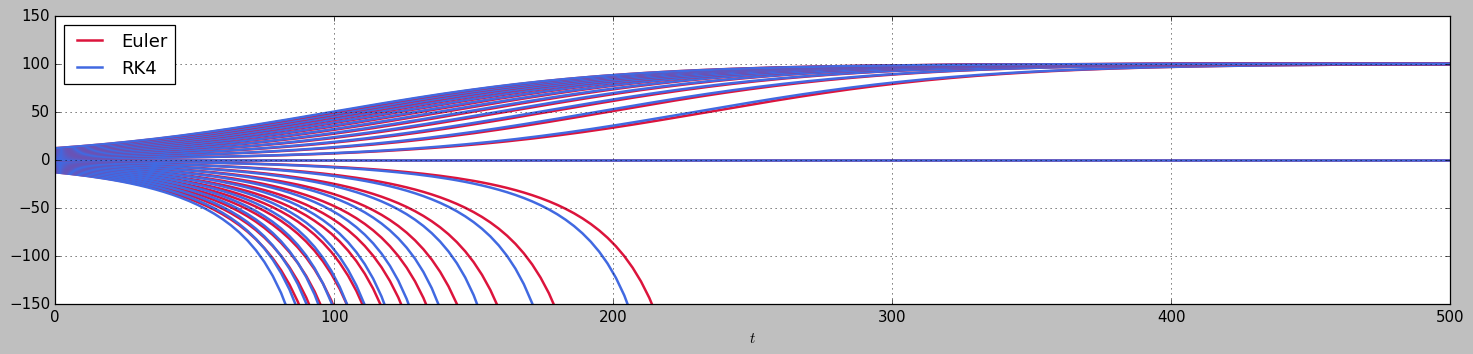

In [25]:
a = 100
h = 3
ti = 0
tf = 1000
x0 = 0.1

plt.figure(figsize=(20, 4), dpi=90)
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( sistema3, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema3, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, 500])
plt.ylim([-150, 150])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

### Circuito RC (Transladado) 


4. \begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}


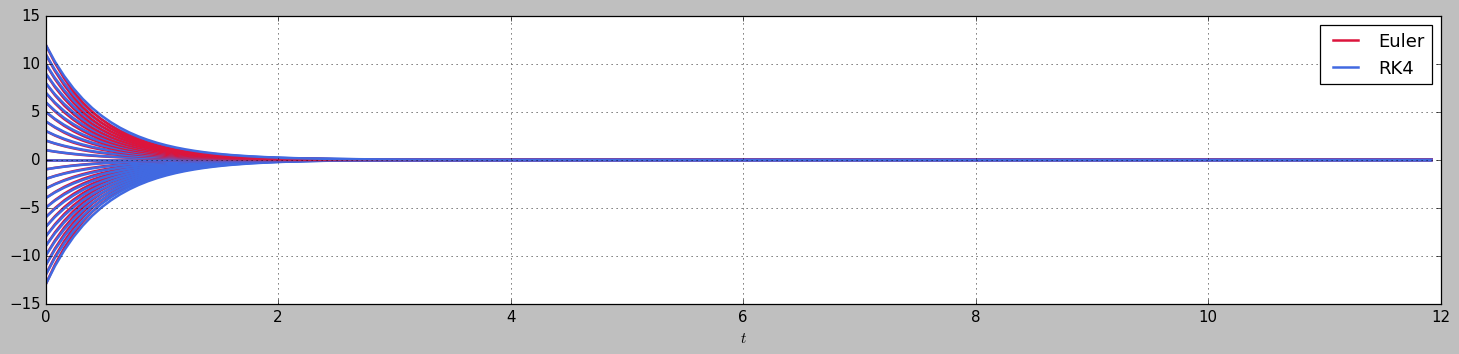

In [31]:
a = 0.5
h = 0.08
ti = 0
tf = 12
x0 = 0.9

plt.figure(figsize=(20, 4), dpi=90)
for i in range(-13,13,1):
    x0=i
    t1,x1 = euler( sistema4, h, ti, tf, x0, a )
    t2,x2 = rk4( sistema4, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'crimson', linewidth = 2)
      plt.plot( t2, x2, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()